In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('C:\\Users\\admin\\Desktop\\moviesprediction.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14980 non-null  float64
 2   Duration  7241 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13124 non-null  object 
 9   Actor 3   12356 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [3]:
df.isnull().sum()

Name           0
Year         529
Duration    8268
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2385
Actor 3     3153
dtype: int64

In [4]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [5]:
df.dropna(subset=df.columns[1:9],how='all',inplace=True)

In [6]:
df.dropna(subset=['Name','Year'],how='all',inplace=True)

In [7]:
df.drop_duplicates(['Name','Year'],keep='first',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15477 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15477 non-null  object 
 1   Year      14957 non-null  float64
 2   Duration  7236 non-null   object 
 3   Genre     13614 non-null  object 
 4   Rating    7915 non-null   float64
 5   Votes     7916 non-null   object 
 6   Director  14962 non-null  object 
 7   Actor 1   13875 non-null  object 
 8   Actor 2   13109 non-null  object 
 9   Actor 3   12346 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.3+ MB


In [9]:
df.dropna(subset=['Year'],inplace=True)

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

# Assuming movie_file is your DataFrame loaded from a file or other source
# movie_file = pd.read_csv('path_to_your_file.csv')  # Example of loading data from a CSV file

# Check if movie_file is loaded and 'Year' column exists
if 'movie_file' in locals() and 'Year' in movie_file.columns:
    # Handle NaN values if present and convert 'Year' column to integers
    movie_file = movie_file.dropna(subset=['Year'])
    try:
        movie_file['Year'] = movie_file['Year'].astype(int)
    except ValueError as e:
        print(f"Error converting 'Year' to integers: {e}")
        print("Please check the 'Year' column for non-numeric values.")
    
    # Get annual movie release counts and sort by year
    release_counts = movie_file['Year'].value_counts().sort_index()

    # Plot the data
    ax = sb.lineplot(x=release_counts.index, y=release_counts.values)
    darkgrid_positions = range(min(movie_file['Year']), max(movie_file['Year']) + 1, 5)

    # Set title and labels
    ax.set_title("Annual Movie Release Counts Over Time")
    ax.set_xlabel("Years")
    ax.set_ylabel("Count")

    # Set the x-ticks and their labels
    ax.set_xticks(darkgrid_positions)
    ax.set_xticklabels(darkgrid_positions, rotation=90)

    # Show the plot
    plt.show()
else:
    print("The 'Year' column is not present in the DataFrame or 'movie_file' is not defined.")


The 'Year' column is not present in the DataFrame or 'movie_file' is not defined.


In [13]:
df['Duration']=df['Duration'].str.extract(r'([0-9]+)',expand=False)

In [14]:
def get_mode_with_default(x):
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result[0]
    else:
        return 'unknown'  

df['Actor 1']=df['Actor 1'].fillna(df.groupby('Year')['Actor 1'].transform(get_mode_with_default))
df['Actor 2']=df['Actor 2'].fillna(df.groupby('Year')['Actor 2'].transform(get_mode_with_default))
df['Actor 3']=df['Actor 3'].fillna(df.groupby('Year')['Actor 3'].transform(get_mode_with_default))

In [15]:
df['Director']=df.groupby(['Year','Actor 1','Actor 2','Actor 3'])['Director'].transform(get_mode_with_default)

In [16]:
df['Duration']=pd.to_numeric(df['Duration'])

In [17]:
def get_mean_with_default(x):
    mean_result = x.mean()
    if not math.isnan(mean_result):        
            return round(mean_result)
    else:
        return 0
df['Duration']=df.groupby(['Year','Director','Actor 1','Actor 2','Actor 3'])['Duration'].transform(get_mean_with_default)

In [18]:
df['Rating']=df.groupby(['Director','Actor 1'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby(['Director','Actor 2'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby(['Director','Actor 3'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby(['Year','Director'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby('Year')['Rating'].transform(lambda x:x.mean())
df['Year']=pd.to_numeric(df['Year'])

In [19]:
df['Votes']=df['Votes'].str.extract(r'([0-9]+)',expand=False)
df['Votes']=pd.to_numeric(df['Votes'])

In [20]:
df['Votes']=df.groupby(['Year','Rating'])['Votes'].transform(lambda x:x.mean())

In [21]:
df['Votes']=df.groupby('Year')['Votes'].transform(lambda x:x.mean())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14957 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14957 non-null  object 
 1   Year      14957 non-null  float64
 2   Duration  14957 non-null  int64  
 3   Genre     13122 non-null  object 
 4   Rating    14946 non-null  float64
 5   Votes     14907 non-null  float64
 6   Director  14957 non-null  object 
 7   Actor 1   14957 non-null  object 
 8   Actor 2   14957 non-null  object 
 9   Actor 3   14957 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


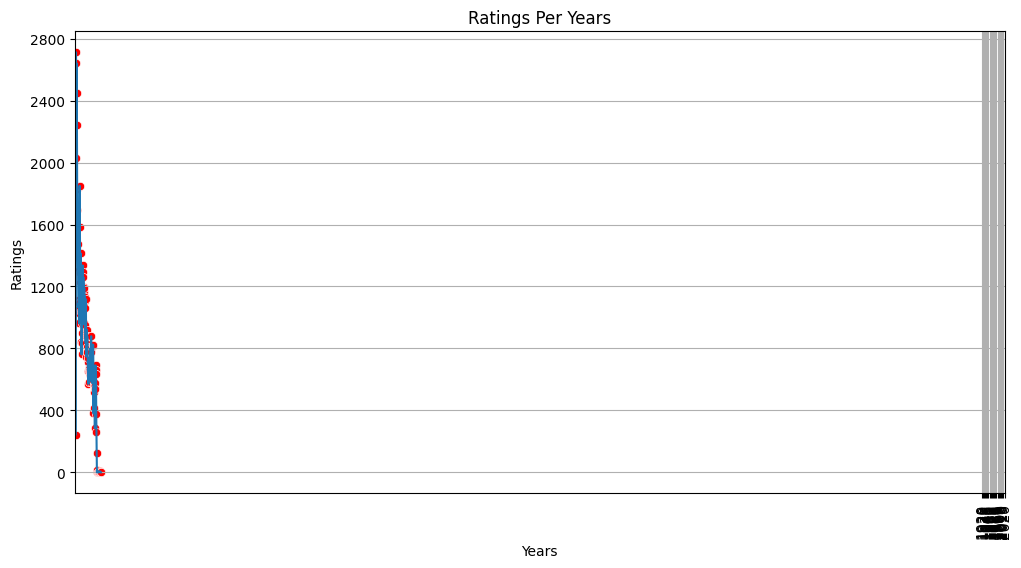

In [23]:
#Year with best rating
rating_sum=df.groupby('Year')['Rating'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_sum)
sns.scatterplot(x='Year',y='Rating',data=rating_sum,color='r')
plt.yticks(np.arange(0,3000,400))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Ratings')
plt.xlabel('Years')
plt.title('Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

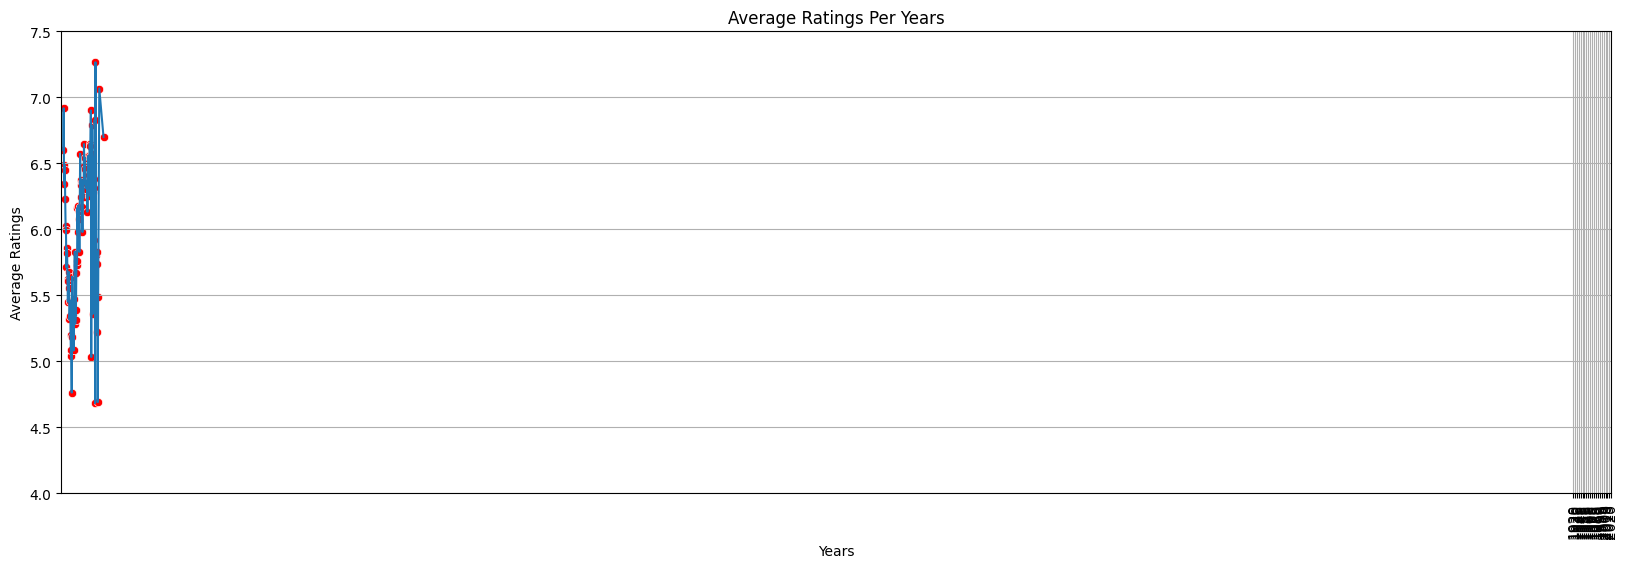

In [24]:
rating_avg=df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(20,6))
sns.lineplot(x='Year',y='Rating',data=rating_avg)
sns.scatterplot(x='Year',y='Rating',data=rating_avg,color='r')
plt.yticks(np.arange(4,8,0.5))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Ratings')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Correlation Of Duration And Rating is -0.07506442060446195


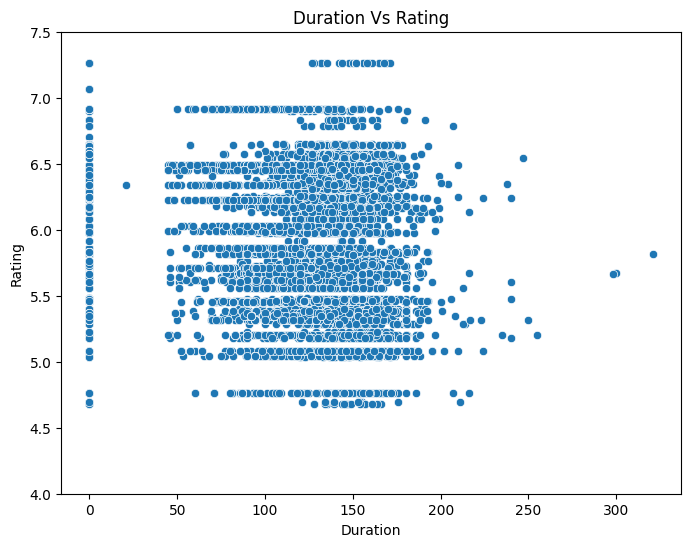

In [26]:
corr_leng_rat=df['Duration'].corr(df['Rating'])
print(f"Correlation Of Duration And Rating is {corr_leng_rat}")
#show there is no impact of duration on rating

plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration',y='Rating',data=df)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration Vs Rating')
plt.yticks(np.arange(4,8,0.5))
plt.show()

In [27]:
overall=df.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 Movies Overall:")
overall

Top 10 Movies Overall:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Abhagin,-1938.0,151,NaN,7.266085,9.555556,Prafulla Roy,Molina Devi,Prithviraj Kapoor,Vijay Kumar
1,Abhilasha,-1938.0,134,NaN,7.266085,9.555556,Zia Sarhadi,Mahendra Thakore,M. Kumar,Bibbo
2,Adhikar,-1938.0,132,NaN,7.266085,9.555556,P.C. Barua,P.C. Barua,Jamuna,Pahadi Sanyal
3,Baazigar,-1938.0,152,NaN,7.266085,9.555556,Mohan Dayaram Bhavnani,K.L. Saigal,Ashok Kumar,Bibbo
4,Baghban,-1938.0,159,Drama,7.266085,9.555556,Abdul Rashid Kardar,Bimla Kumari,B. Nandrekar,Sitara Devi
5,Bahadur Kisan,-1938.0,0,NaN,7.266085,9.555556,Master Bhagwan,Chandrarao,Chandrarao,Hansa Wadkar
6,Ban Ki Chidiya,-1938.0,0,Action,7.266085,9.555556,Jayant Desai,Madhuri,Eddie Billimoria,Ishwarlal
7,Banke Sanvaria,-1938.0,0,NaN,7.266085,9.555556,Nanubhai Vakil,Navinchandra,Vatsala Kumthekar,Yasmin
8,Bhabi,-1938.0,0,"Drama, Family",7.266085,9.555556,Franz Osten,Renuka Devi,Paidi Jairaj,Meera
9,Bhedi Trishul,-1938.0,0,NaN,7.266085,9.555556,A.M. Khan,Ameena,Ansari,Kamia


In [29]:
rat_bool=df['Rating']>=6
vot_bool=df['Votes']>110
pop_df=df[vot_bool & rat_bool]
pop_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,6.489797,121.779116,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90,"Drama, Musical",6.917411,114.602564,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110,"Comedy, Romance",6.489797,121.779116,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
15,102 Not Out,-2018.0,102,"Comedy, Drama",6.450093,111.070175,Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz
20,12 Bulbule,-2021.0,0,"Comedy, Drama, Family",6.917411,114.602564,Jagat Joon,Sonu Sonkar,Sunita Verman,Anubhav Dixit
...,...,...,...,...,...,...,...,...,...,...
15426,Zero,-2018.0,164,"Comedy, Drama, Romance",6.450093,111.070175,Aanand L. Rai,Shah Rukh Khan,Anushka Sharma,Katrina Kaif
15479,Zindagi Tumse,-2019.0,120,Family,6.489797,121.779116,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15480,Zindagi Unlimited,-2021.0,105,NaN,6.917411,114.602564,Vipin Agnihotri,Amit Pandey,Kanchi Rohela,Kritika Sanghavi
15484,Zinga,-2021.0,0,"Adventure, Fantasy, Sci-Fi",6.917411,114.602564,Jaishankar Chigurula,Sri Ram,Devan Sanjeev,Kasu Naveen Kumar


In [30]:
df.dropna(inplace=True)
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

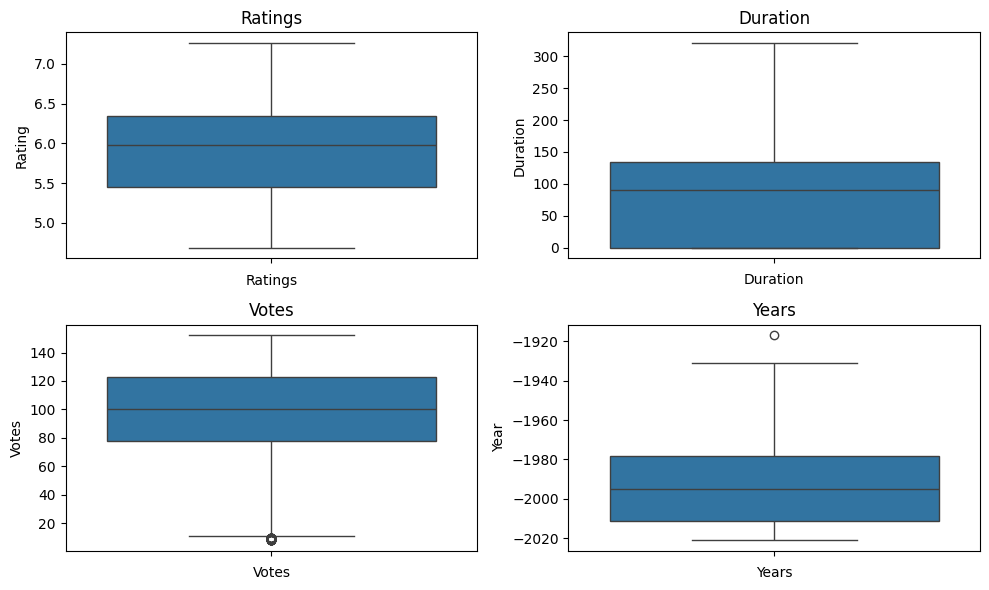

In [31]:
#df.reset_index()
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,6))

sns.boxplot(data=df,y='Rating',ax=ax[0][0])
ax[0][0].set_title('Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=df,y='Duration',ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df,y='Votes',ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=df,y='Year',ax=ax[1][1])
ax[1][1].set_title('Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

In [32]:
def out(df,col,dis):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-(iqr*dis)
    upper=q3+(iqr*dis)
    return lower,upper

In [33]:
votes_low,votes_up=out(df,'Votes',1.5)

In [34]:
vote_out_count=(df['Votes'] > votes_up) | (df['Votes'] < votes_low)

In [35]:
df['Votes'][vote_out_count].count()

41

In [36]:
df=df[(df['Votes']>votes_low) & (df['Votes']<votes_up)]

In [37]:
year_low,year_upper=out(df,'Year',1.5)

In [38]:
year_out_count=(df['Year']>year_upper) | (df['Year']<year_low)

In [39]:
df['Year'][year_out_count].count()

1

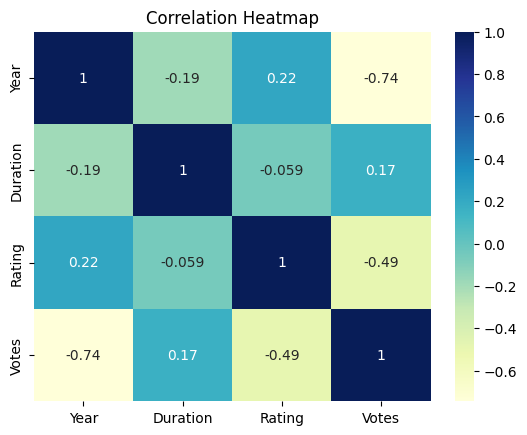

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Identify numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=np.number).columns

# Create a heatmap of the correlation matrix for numeric columns only
sns.heatmap(df[numeric_cols].corr(), cmap='YlGnBu', annot=True)

plt.title('Correlation Heatmap')
plt.show()


In [43]:
df=df[(df['Year']>year_low) &(df['Year']<year_upper)]
df.shape

(13041, 10)

In [44]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
df['Name']=LB.fit_transform(df['Name'])
df['Genre']=LB.fit_transform(df['Genre'])
df['Director']=LB.fit_transform(df['Director'])
df['Actor 1']=LB.fit_transform(df['Actor 1'])
df['Actor 2']=LB.fit_transform(df['Actor 2'])
df['Actor 3']=LB.fit_transform(df['Actor 3'])

C:\Users\admin\AppData\Local\Temp\ipykernel_15768\4065632305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name']=LB.fit_transform(df['Name'])
C:\Users\admin\AppData\Local\Temp\ipykernel_15768\4065632305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre']=LB.fit_transform(df['Genre'])
C:\Users\admin\AppData\Local\Temp\ipykernel_15768\4065632305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [45]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [46]:
from sklearn.model_selection import train_test_split
x=df.drop('Rating',axis=1)
y=df['Rating']

In [47]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
LR.fit(train_x,train_y)
pre_test=LR.predict(test_x)

In [49]:
pre_test

array([6.01872372, 5.85682028, 5.91497362, ..., 5.82767985, 5.51101357,
       6.41077972])

In [50]:
pre_train=LR.predict(train_x)

In [51]:
from sklearn.metrics import r2_score
score_test=r2_score(test_y,pre_test)
score_train=r2_score(train_y,pre_train)
print("print r2_score",score_test)
print('print r2_score',score_train)

print r2_score 0.292743577278168
print r2_score 0.2886511462918052


In [53]:
from sklearn.model_selection import GridSearchCV

param={'alpha':[0.01, 0.1, 1.0, 10.0]}
grid=GridSearchCV(estimator=RL,param_grid=param,cv=5)
grid.fit(train_x,train_y)

print(grid.best_params_,grid.best_estimator_)

{'alpha': 10.0} Ridge(alpha=10.0)


In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=10,random_state=42,shuffle=True)
cv=cross_val_score(RL,x,y,cv=kf,n_jobs=-1)
print('Accuracy : ',cv.mean()*100)

Accuracy :  28.784271246179166


In [57]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [62]:
from lightgbm import LGBMRegressor
LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(train_x, train_y)
lgbm_pre_test = LGBMR.predict(test_x)
lgbm_pre_train=LGBMR.predict(train_x)
r2_test_lgbm=r2_score(test_y,lgbm_pre_test)
r2_train_lgbm=r2_score(train_y,lgbm_pre_train)
print("print r2_score",r2_test_lgbm)
print('print r2_score',r2_train_lgbm)
mse_lgbm = mean_squared_error(test_y, RL_pre_test)
print(mse_lgbm)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1821
[LightGBM] [Info] Number of data points in the train set: 9128, number of used features: 9
[LightGBM] [Info] Start training from score 5.898599
print r2_score 0.9996858459514545
print r2_score 0.9998525355670594
0.1914641977723386


In [60]:
cv2=cross_val_score(LGBMR,x,y,cv=kf,n_jobs=-1)
print('Accuracy : ',cv2.mean()*100)

Accuracy :  99.98090139028717


In [65]:
LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
rfk = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(LGBMR, x, y, cv=rfk, n_jobs=-1)
print('Accuracy:', np.mean(cv_scores) * 100)


Accuracy: 99.95361313307103
